<a href="https://colab.research.google.com/github/Eswar-8/Predicting_Heart-Disease/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
data=pd.read_csv('heart.csv')
df=data.dropna()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


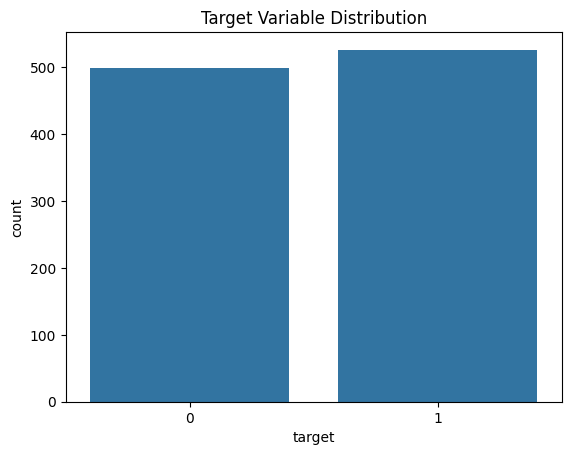

In [4]:
sns.countplot(x='target',data=df)
plt.title('Target Variable Distribution')
plt.show()

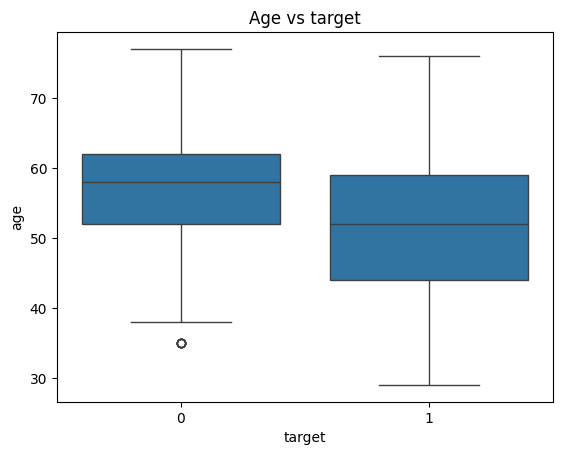

In [5]:
sns.boxplot(x='target',y='age',data=df)
plt.title('Age vs target')
plt.show()

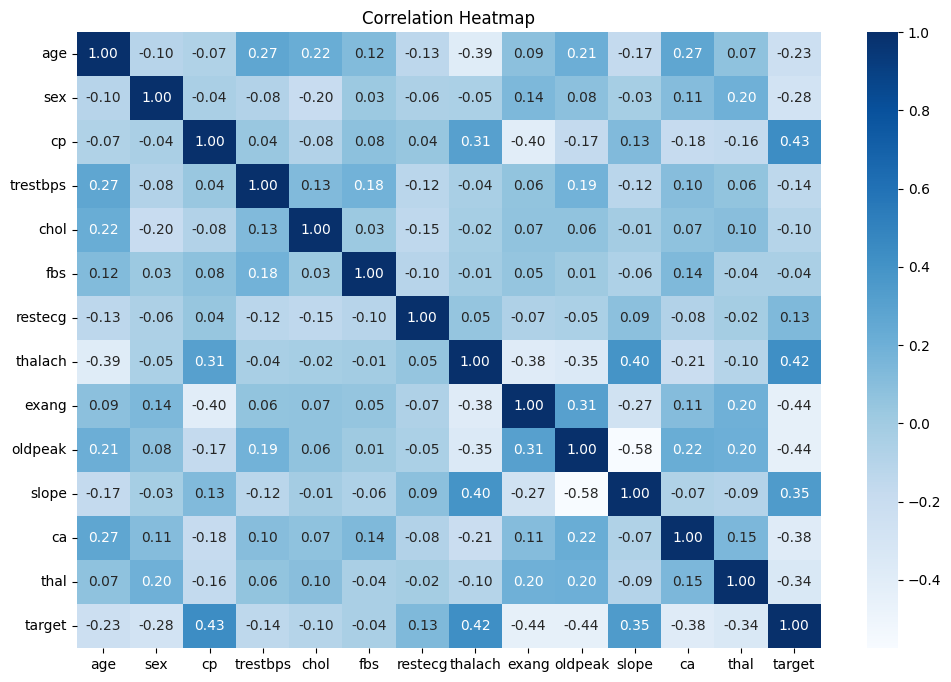

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),cmap='Blues',annot=True,fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
X=df.drop(columns=['target'])
Y=df['target']
print(Y.value_counts())

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

target
1    526
0    499
Name: count, dtype: int64


In [8]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

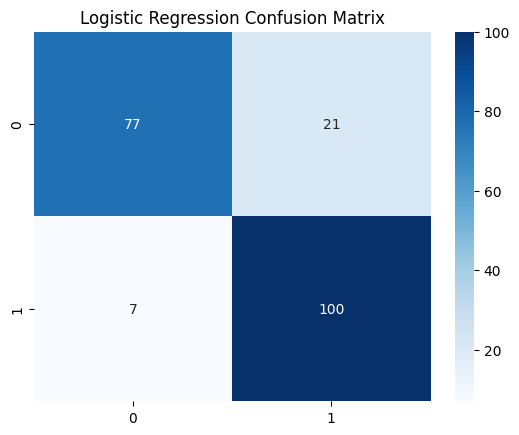

Logistic Regression accuracy score = 0.8634146341463415


In [9]:
lr=LogisticRegression()
lr.fit(x_train_sc,y_train)
y_log_pred=lr.predict(x_test_sc)
accuracy=accuracy_score(y_test,y_log_pred)
cn_log=confusion_matrix(y_test,y_log_pred)
sns.heatmap(cn_log,annot=True,fmt='d',cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
print('Logistic Regression accuracy score =',accuracy)

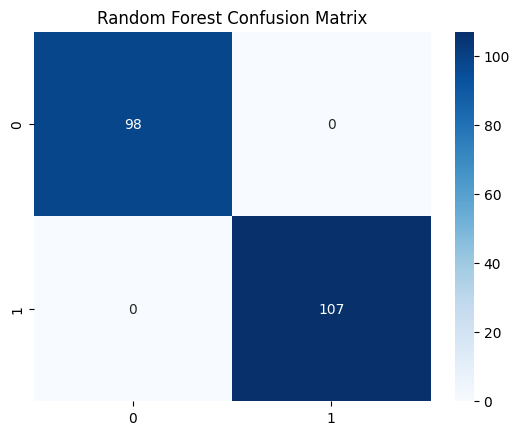

Random Forest accuracy score = 1.0


In [10]:
RF=RandomForestClassifier()
RF.fit(x_train_sc,y_train)
y_RF_pred=RF.predict(x_test_sc)
acc_RF=accuracy_score(y_test,y_RF_pred)
cn_RF=confusion_matrix(y_test,y_RF_pred)
sns.heatmap(cn_RF,annot=True,fmt='d',cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()
print('Random Forest accuracy score =',acc_RF)

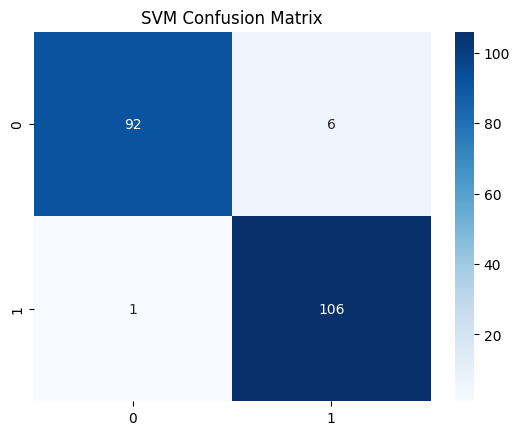

SVM accuracy score = 0.9658536585365853


In [11]:
svm=SVC()
svm.fit(x_train_sc,y_train)
y_svm_pred=svm.predict(x_test_sc)
accuracy=accuracy_score(y_test,y_svm_pred)
cn_svm=confusion_matrix(y_test,y_svm_pred)
sns.heatmap(cn_svm,annot=True,fmt='d',cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()
print('SVM accuracy score =',accuracy)

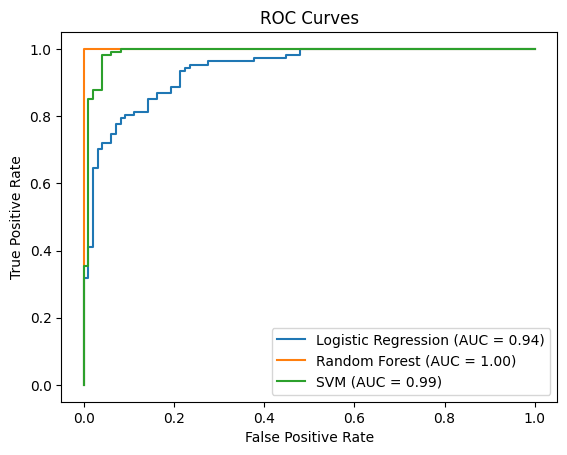

Area under the curve Logistic Regression = 0.9390616059507916
Area under the curve Random Forest = 1.0
Area under the curve SVM = 0.988842265878314


In [12]:
# logistic regression
fp_lr,tp_lr,_=roc_curve(y_test,lr.decision_function(x_test_sc))
auc_lr=auc(fp_lr,tp_lr)

# Random forest
fp_RF,tp_RF,_=roc_curve(y_test,RF.predict_proba(x_test_sc)[:,1])
auc_RF=auc(fp_RF,tp_RF)

# SVM
fp_svm,tp_svm,_=roc_curve(y_test,svm.decision_function(x_test_sc))
auc_svm=auc(fp_svm,tp_svm)

# plot ROC Curves
plt.plot(fp_lr,tp_lr,label="Logistic Regression (AUC = {:.2f})".format(auc_lr))
plt.plot(fp_RF,tp_RF,label="Random Forest (AUC = {:.2f})".format(auc_RF))
plt.plot(fp_svm,tp_svm,label="SVM (AUC = {:.2f})".format(auc_svm))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()
print('Area under the curve Logistic Regression =',auc_lr)
print('Area under the curve Random Forest =',auc_RF)
print('Area under the curve SVM =',auc_svm)